In [1]:
# 必要なパッケージのインストール
!pip install nltk
!pip install gensim

     |████████████████████████████████| 1.4 MB 283 kB/s eta 0:00:01
     |████████████████████████████████| 82 kB 784 kB/s eta 0:00:01
     |████████████████████████████████| 690 kB 332 kB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434678 sha256=95d1ce98c19dab10b6ef8f496eef3e60ad6b9334eaf3970b450b855f90a8c982
  Stored in directory: /Users/yuyafukuchi/Library/Caches/pip/wheels/ff/d5/7b/f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
  Created wheel for regex: filename=regex-2020.6.8-cp38-cp38-macosx_10_15_x86_64.whl size=283425 sha256=997af0831f2857e51a8f33cb56809e3237871b159fad5fcab8a06e7927938a8e
  Stored in directory: /Users/yuyafukuchi/Library/Caches/pip/wheels/92/a0/30/b02d3121ed2dba407862df81a4df87d3f605226e4d72cfd07f
Successfully built nltk regex
     |████████████████████████████████| 24.2 MB 709 kB/s eta 0:00:01
     |████████████████████████████████| 116 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 845 kB/s eta

In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuyafukuchi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yuyafukuchi/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yuyafukuchi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

https://risusan.net/?page_id=10228

日本の観光地の英語解説を文書として用いた

- Mount Fuji（富士山）
- Kiyomizu-dera（清水寺）
- Asakusa（浅草）
- Kinkaku-ji（金閣寺）
- Imperial Palace（皇居）
- Todai-ji Temple（東大寺）
- Tokyo SKYTREE（東京スカイツリー）
- Itsukushima-jinjya（厳島神社）
- Tokyo Disneyland(東京ディズニーランド）
- Tsukiji（築地）

In [2]:
documents = ['Mount Fuji, the great symbol of Japan, is situated on the border of Shizuoka and Yamanashi Prefecture. It is the highest peak in Japan, standing as high as 3,776 meters. Still classified as an active volcano, Mount Fuji is world-famous for its perfect cone shape of unparalleled beauty. This sacred mountain has long been the object of worship among most Japanese and has inspired many artists such as the famous painter Katsushika Hokusai. Designated as a World Cultural Heritage site in 2013, it attracts millions of visitors from all over the world, including mountain climbers and holiday makers.',
             'Kiyomizu-dera is an independent Buddhist temple in eastern Kyoto, which is listed as one of the 17 World Cultural Heritage sites in Kyoto. Priest Enchin is believed to have founded a small thatched-roofed hut to pray for Kannon Bodhisattva in the current precinct in 778. This temple, well-known for its main hall with a large veranda jutting out over the hillside, was originally built by Sakanoue Tamuramaro in 798 and rebuilt by the third Shogun Tokugawa Iemitsu in 1633.',
            'Asakusa is a famous sightseeing spot in Tokyo,which is reminiscent of the Edo period.This district has been flourishing as a temple town of Senso-ji, the oldest and the largest temple in Tokyo. Kaminarimon, or “Thunder Gate,” the outer gate of the temple is very famous as a landmark of Asakusa for its huge red lantern. Both domestic and foreign tourists flock to this venerable temple and the shopping arcade called “Nakamise” in the compound, the best place to buy traditional Japanese souvenirs in Tokyo.',
            'Kinkaku-ji is the Golden Pavilion built on the compound of the Rokuon-ji, a Zen Buddhist temple, which is designated as one of the 17 World Cultural Heritage-listed monuments in Kyoto. It is a three-story building in the garden complex unique to the Muromachi period, with its top two stories covered with pure gold leaf. Originally the villa of an aristocrat, it was purchased and renovated in 1397 as the political center by the third shogun of the Muromachi period, Ashikaga Yoshimitsu.',
            'The Imperial Palace is formerly known as the Edo castle, the stronghold of the Tokugawa Shogunate. This palace has been the residence of so the emperor of Japan since after the Meiji Restoration in 1868. The palace with a compound of 1.15 million square meters consists of the main palace where ceremonies and functions are held, the residence of the Emperor and Empress, and the East Garden containing the ruins of Tenshukaku Donjon. The Chowaden Hall, located in the main Imperial Palace, is noted for the New Year’s visit by the general public to the Imperial Palace.',
            'Todai-ji Temple, located in Nara City, is one of Japan’s most famous Buddhist temples and a World Heritage site listed as “Historic Monuments of Ancient Nara.” This venerable temple was originally built as the headquarters of all the Kegon sect Buddhist temples by Emperor Shomu in 728. Its Great Buddha Hall, which is one of the world’s largest wooden buildings, houses one of the world’s largest bronze statues of Buddha. The huge statue and a herd of deer around the precincts attract millions of visitors every year.',
            'TOKYO SKYTREE was built in 2012 as the world’s tallest self-supporting communications tower with a height of 634 meters. Its basic concepts are fusion of futuristic design and the traditional beauty of Japan, revitalization of the city, and contribution to safety and disaster prevention. Boasting two observatories (at 350m and 450m) that command a breathaking panorama of Tokyo and its nighboring prefectures, this majestic broadcasting tower makes the traditional downtown area a thriving hub of international tourism.',
            'Itsukushima-jinjya in Hiroshima Prefecture is a Shinto shrine dedicated to the three daughters of the deity of seas and storms on the sacred Miyajima Island in the Seto Inland Sea, where gods are believed to reside. The vermilion-painted buildings connected by the corridors and its symbolic great torii gate appear as if floating on the sea at high tides. Standing in perfect harmony with its natural surroundings, this elegant palace-style architecture was registered on the list of the UNESCO World Heritage in 1996.',
            'Tokyo Disneyland, located in Urayasu, Chiba Prefecture, has been Japan’s premier theme park since it was opened in 1983. It was the first Disney theme park opened outside the United States. With its symbolic Cinderella Castle standing at the center, it has seven themed lands, each of which offers a dream-filled experience to all generations. The park developed into a successful Resort Park with the opening of Tokyo DisneySea in 2001, attracting nearly 25 million visitors annually. ',
            'Formally called the Tokyo Central Wholesale Market, Tsukiji is home to one of the world’s largest fish markets where more than 400 different types of seafood are handled every day. In the atmosphere of hustle and bustle, vendors sell not only fresh fish and other marine products but also fruits, vegetables and meat. The tuna auction that starts before dawn vividly illustrates a brisk trade of seafood unique to Japan and has always been a popular attraction among Japanese and foreign tourists.']

In [3]:

#1 nltkのストップワードリスト
en_stop = nltk.corpus.stopwords.words('english')
print(en_stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
preprocessed_documents = [[] for _ in range(10)]

for i, doc in enumerate(documents):
    for word in  doc.split():
        if word not in en_stop:
            preprocessed_documents[i].append(word)

In [5]:
def bow_vectorizer(docs):
  word2id = {}
  for doc in docs:
    for w in doc:
      if w not in word2id:
        word2id[w] = len(word2id)
        
  result_list = []
  for doc in docs:
    doc_vec = [0] * len(word2id)
    for w in doc:
      doc_vec[word2id[w]] += 1
    result_list.append(doc_vec)
  return result_list, word2id

In [6]:
bow_vec, word2id = bow_vectorizer(preprocessed_documents)

In [7]:
def tfidf_vectorizer(docs):
  def tf(word2id, doc):
    term_counts = np.zeros(len(word2id))
    for term in word2id.keys():
      term_counts[word2id[term]] = doc.count(term)
    tf_values = list(map(lambda x: x/sum(term_counts), term_counts))
    return tf_values
  
  def idf(word2id, docs):
    idf = np.zeros(len(word2id))
    for term in word2id.keys():
      idf[word2id[term]] = np.log(len(docs) / sum([bool(term in doc) for doc in docs]))
    return idf
  
  word2id = {}
  for doc in docs:
    for w in doc:
      if w not in word2id:
        word2id[w] = len(word2id)
  
  return [[_tf*_idf for _tf, _idf in zip(tf(word2id, doc), idf(word2id, docs))] for doc in docs], word2id

In [9]:
tfidf_vector, word2id = tfidf_vectorizer(preprocessed_documents)

In [10]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# BoWとTF-IDFベクトルのコサイン類似度


## Bag of Words

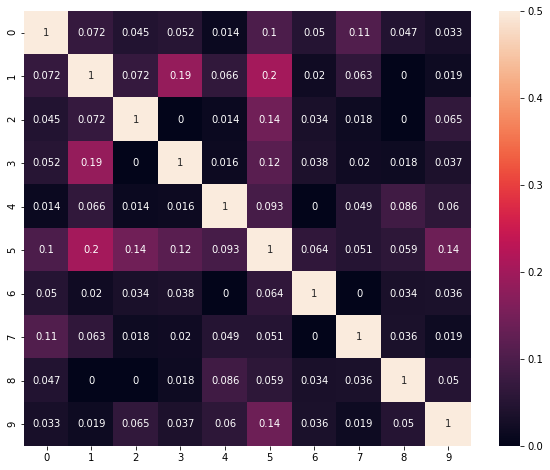

In [11]:
bow_sim_matrix = [ [cos_sim(bow_vec[i],bow_vec[j]) for i  in range(len(documents))] for j in range(len(documents))]

plt.figure(figsize=(10,8))
sns.heatmap(bow_sim_matrix,annot=True,vmax=0.5)

## TF-IDF

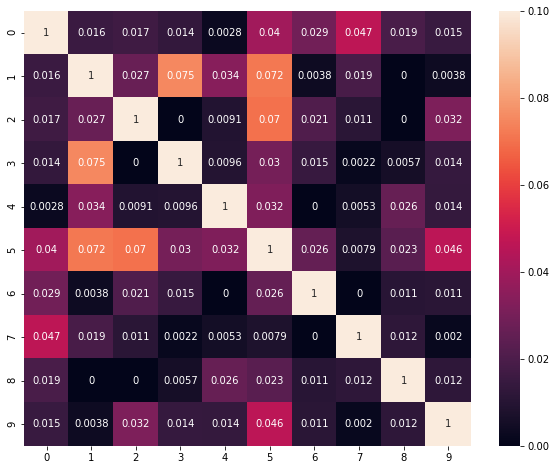

In [12]:
sim_matrix = [ [cos_sim(tfidf_vector[i],tfidf_vector[j]) for i  in range(len(documents))] for j in range(len(documents))]

plt.figure(figsize=(10,8))
sns.heatmap(sim_matrix,annot=True,vmax=0.1)

# BoWとTF-IDFベクトルのユークリッド距離

In [13]:
def euclidean_distance(list_a, list_b):
  diff_vec = np.array(list_a) - np.array(list_b)
  return np.linalg.norm(diff_vec)

## Bag of Words

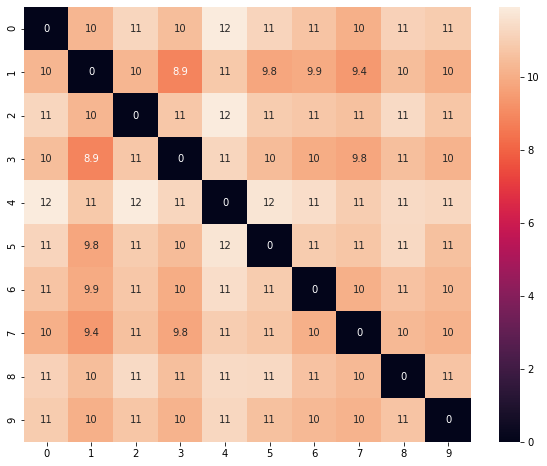

In [14]:
bow_euclidean_matrix = [[euclidean_distance(bow_vec[i],bow_vec[j]) for i  in range(len(documents))] for j in range(len(documents))]

plt.figure(figsize=(10,8))
sns.heatmap(bow_euclidean_matrix,annot=True)

## TFIDF

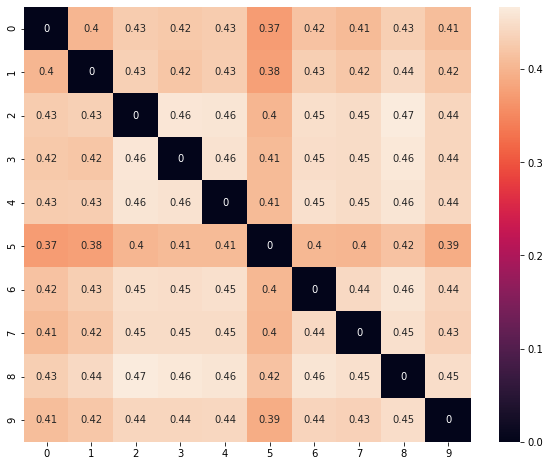

In [15]:
euclidean_matrix = [[euclidean_distance(tfidf_vector[i],tfidf_vector[j]) for i  in range(len(documents))] for j in range(len(documents))]

plt.figure(figsize=(10,8))
sns.heatmap(euclidean_matrix,annot=True)

- 0: Mount Fuji（富士山）
- 1: Kiyomizu-dera（清水寺）
- 2: Asakusa（浅草）
- 3: Kinkaku-ji（金閣寺）
- 4: Imperial Palace（皇居）
- 5: Todai-ji Temple（東大寺）
- 6: Tokyo SKYTREE（東京スカイツリー）
- 7: Itsukushima-jinjya（厳島神社）
- 8: Tokyo Disneyland(東京ディズニーランド）
- 9: Tsukiji（築地）

# 考察

コサイン類似度、ユークリッド距離どちらにおいても、1: 清水寺,3: 金閣寺, 5: 東大寺の類似度が高く、予想通りの結果となった

コサイン類似度では似ている文書と似ていない文書の差がはっきり出るのに対して、ユークリッド距離ではあまり差が出ていない。また似ている文書が二つの距離尺度において異なることがわかる。

BoW表現でのユークリッド距離の評価ではほとんど有意な評価ができなかった

